In [1]:
import histogram_manager as hm
import utils
import numpy as np
import stage2
import stage1
import ROOT
from scipy import special
from scipy.stats import norm

%jsroot on

Welcome to JupyROOT 6.28/00


In [2]:
det_map = utils.load_det_map("../data/run_info_2023apr_Cd.toml")
det_angle = det_map["angle"]

In [3]:
# hists = hm.HistogramManager("../output/2023apr_asym_Cd.root")
# hists_beam = hm.HistogramManager("../output/2023apr_asym_beam.root")
# hists_bkg = hm.HistogramManager("../output/2023apr_asym_Cd_bkg.root")
hists = hm.HistogramManager("../output/2023apr_asym_Cd_constbin.root")
hists_beam = hm.HistogramManager("../output/2023apr_asym_beam_constbin.root")
hists_bkg = hm.HistogramManager("../output/2023apr_asym_Cd_bkg_constbin.root")
hists

<HistogramManager(filename='../output/2023apr_asym_Cd_constbin.root', total_objects=353)>


Name              | Type  
---------------------------
hEgam             | 📂 TH1D
hEgam_gate45      | 📂 TH1D
hEn               | 📂 TH1D
hEn_gate9394      | 📂 TH1D
hEn_gate9394SE    | 📂 TH1D
hEn_gate9394SEbkg | 📂 TH1D
hEn_gate9394bkg   | 📂 TH1D
hEn_gtzero        | 📂 TH1D
hEn_zero          | 📂 TH1D
hPulseHeight      | 📂 TH1D
hTOF_mus          | 📂 TH1D
hEn_gate477_all   | 📊 TH1D

In [4]:
# %jsroot off
# c = hists.plot_folder("hEn",3.5,5.5)
# c.Draw()

In [5]:
hEn_beam_intensity = hists_beam.get("hEn_beam_intensity")
hEn_gate9394 = hists.get("hEn_gate9394")
hEn_gate9394bkg = hists_bkg.get("hEn_gate9394bkg_scaled")

hEn_zero = hists.get("hEn_zero")
hEn_gtzero = hists.get("hEn_gtzero")


pu_dict = stage1.get_pu_corr_dict({"hEn_gtzero":hEn_gtzero},{"hEn_zero":hEn_zero})

for key, hist in hEn_gate9394.items():
    
    hist.Divide(hEn_beam_intensity)
    
    for key_bkg, hist_bkg in hEn_gate9394bkg.items():
        if utils.same_channel(key,key_bkg):
            hist.Add(-1*hist_bkg)
            
    for key_pu, hist_pu in pu_dict.items():
        if utils.same_channel(key,key_pu):
            hist.Multiply(hist_pu)


In [6]:
hEn_gate9394SE = hists.get("hEn_gate9394SE")
hEn_gate9394SEbkg = hists_bkg.get("hEn_gate9394SEbkg_scaled")



for key, hist in hEn_gate9394SE.items():
    
    hist.Divide(hEn_beam_intensity)
    
    for key_bkg, hist_bkg in hEn_gate9394SEbkg.items():
        if utils.same_channel(key,key_bkg):
            hist.Add(-1*hist_bkg)
            
    for key_pu, hist_pu in pu_dict.items():
        if utils.same_channel(key,key_pu):
            hist.Multiply(hist_pu)

In [7]:
hists.add_by_angle("hEn_gate9394",det_angle)
hists.add_by_angle("hEn_gate9394SE",det_angle)
hists

<HistogramManager(filename='../output/2023apr_asym_Cd_constbin.root', total_objects=367)>


Name                 | Type  
------------------------------
hEgam                | 📂 TH1D
hEgam_gate45         | 📂 TH1D
hEn                  | 📂 TH1D
hEn_gate9394         | 📂 TH1D
hEn_gate9394SE       | 📂 TH1D
hEn_gate9394SE_angle | 📂 TH1D
hEn_gate9394SEbkg    | 📂 TH1D
hEn_gate9394_angle   | 📂 TH1D
hEn_gate9394bkg      | 📂 TH1D
hEn_gtzero           | 📂 TH1D
hEn_zero             | 📂 TH1D
hPulseHeight         | 📂 TH1D
hTOF_mus             | 📂 TH1D
hEn_gate477_all      | 📊 TH1D

In [8]:
hist_clear = hists.get("hEn_gate9394_angle_108")
hist_clear.Reset()
# hists

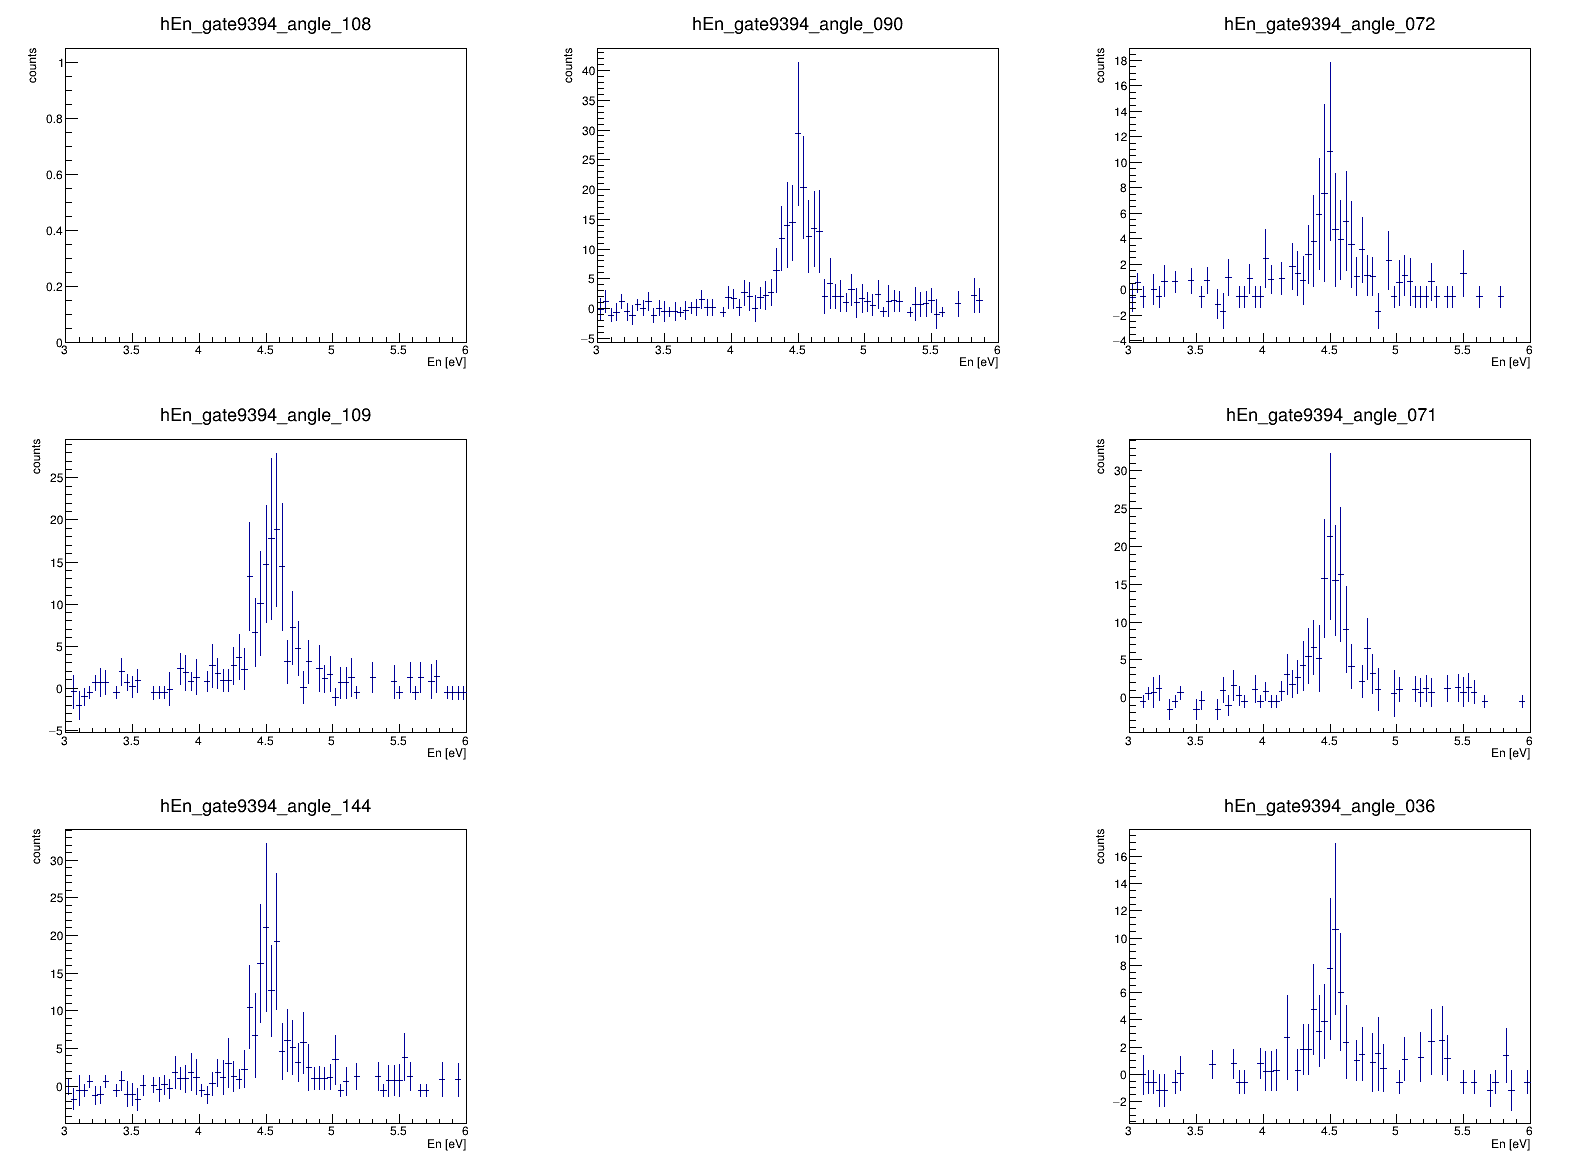

In [9]:
%jsroot off

# hists.subtract_background("hEn_gate9394_angle",1,6)

hists.rebin_in_place("hEn_gate9394_angle",4)
c = hists.plot_by_angle('hEn_gate9394_angle', 3,6)
# hists.rebin_in_place("hEn_gate9394SE_angle",200)
c1 = hists.plot_by_angle('hEn_gate9394SE_angle', 3,6)
ROOT.gStyle.SetOptStat(0)
c.Draw()
# c1.Draw()

In [10]:
%jsroot on

# A_LH_angle, dA_LH_angle = hists.calc_A_LH("hEn_gate9394_angle",4.54,1.5*0.16) # 4.52 # 4.503 # 4.553
A_LH_angle, dA_LH_angle = hists.calc_A_LH_error("hEn_gate9394_angle",4.54,1.5*0.16) # 4.52 # 4.503 # 4.553


angle = np.array([36,71,72,90,108,109,144])
cos_angle = np.cos(np.pi/180*angle)

not_nan_indices = ~np.isnan(A_LH_angle)
A_LH_angle = A_LH_angle[not_nan_indices]
dA_LH_angle = dA_LH_angle[not_nan_indices]
cos_angle = cos_angle[not_nan_indices]

not_nan_indices_d = ~np.isnan(dA_LH_angle)
A_LH_angle = A_LH_angle[not_nan_indices_d]
dA_LH_angle = dA_LH_angle[not_nan_indices_d]
cos_angle = cos_angle[not_nan_indices_d]

# not_zero_indices =  np.nonzero(dA_LH_angle)
# A_LH_angle = A_LH_angle[not_zero_indices]
# dA_LH_angle = dA_LH_angle[not_zero_indices]
# cos_angle = cos_angle[not_zero_indices]

dA_LH_angle [dA_LH_angle  == 0] = 1e-10

A_LH_graph = stage2.create_A_LH_graph(cos_angle, A_LH_angle, dy = dA_LH_angle)

A_LH_graph.SetTitle("")

slope, error, p_val, fit_p_val = stage2.linear_fit(A_LH_graph)
# print(A_LH_angle)
# print(dA_LH_angle)
# p_val = 1/2 * (1 - ROOT.TMath.Erf(slope/ROOT.TMath.Sqrt(2)/error))
# y_p = 1/2 * (1 - special.erf(slope/np.sqrt(2)/error))
# print(f"p_val = {p_val}")


fit = stage2.linear_fit_and_plot(A_LH_graph)

p_value = 2 * (1 - norm.cdf(abs(slope/error)))
# print(p_value)
# print(f"fit p-value = {fit_p_val}")
# print(1/2 * (1 - ROOT.TMath.Erf(slope/ROOT.TMath.Sqrt(2)/error)))

/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:530: RuntimeWarning: invalid value encountered in divide
  return (N_L - N_H) / (N_L + N_H)
/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:539: RuntimeWarning: invalid value encountered in divide
  term1 = (N_H / denominator) * sigma_N_L
/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:540: RuntimeWarning: invalid value encountered in divide
  term2 = (-N_L / denominator) * sigma_N_H


In [11]:
print(hists)

bin_edges_array = hists.get("hEn_gate9394_angle_090").GetXaxis().GetXbins()
xbins_En = np.array([bin_edges_array[i] for i in range(bin_edges_array.GetSize())])


# xvals= np.arange(0.3, 30, 0.01)
# xval= np.arange(4.4, 5.4, 0.01)

# xvals = xbins_En[85000:175000]
# xvals = xbins_En[85000:190000]
# xvals = xbins_En[:75000]

xvals = xbins_En

# print(xvals)

angle = np.array([36,71,72,90,108,109,144])

xval = []
yval = []
y_p_val = []
yerr = []
fit_p_val = []

for x in xvals:
    
    cos_angle = np.cos(np.pi/180*angle)
    # A_LH_angle, dA_LH_angle = hists.calc_A_LH("hEn_gate9394_angle",x,1.5*0.16)
    A_LH_angle, dA_LH_angle = hists.calc_A_LH_error("hEn_gate9394_angle",x,1.5*0.16)
    # print(len(A_LH_angle))
    
    
    not_nan_indices = ~np.isnan(A_LH_angle)
    A_LH_angle = A_LH_angle[not_nan_indices]
    dA_LH_angle = dA_LH_angle[not_nan_indices]
    cos_angle = cos_angle[not_nan_indices]  
    
    not_nan_indices_d = ~np.isnan(dA_LH_angle)
    A_LH_angle = A_LH_angle[not_nan_indices_d]
    dA_LH_angle = dA_LH_angle[not_nan_indices_d]
    cos_angle = cos_angle[not_nan_indices_d]
    
    # not_zero_indices =  np.nonzero(dA_LH_angle)
    # A_LH_angle = A_LH_angle[not_zero_indices]
    # dA_LH_angle = dA_LH_angle[not_zero_indices]
    # cos_angle = cos_angle[not_zero_indices]
    
    dA_LH_angle [dA_LH_angle  == 0] = 1e-10
    
    
    if len(A_LH_angle) != len(dA_LH_angle) != len(cos_angle):
        print("problem")
    
    
    if len(A_LH_angle) < 7:
        slope, error, prob = 0, 0.001, 0
        continue
    else:
        try:
            A_LH_graph = stage2.create_A_LH_graph(cos_angle, A_LH_angle, dy = dA_LH_angle)
        except TypeError:
            print(slope, error, prob)
            
        slope, error, p_val, prob = stage2.linear_fit(A_LH_graph)
    
    xval.append(x)
    yval.append(slope)
    yerr.append(error)
    y_p_val.append(p_val)
    fit_p_val.append(prob)

xval = np.array(xval)
yval = np.array(yval)
yerr = np.array(yerr)
y_p = np.array(y_p_val)
fit_p_val = np.array(fit_p_val)

y_p  = 2 * (1 - norm.cdf(abs(yval/yerr)))
# y_p = fit_p_val

# print(y_p[y_p<0.00001])

# y_p = 1/2 * (1 - special.erf(yval/np.sqrt(2)/yerr))



<HistogramManager(filename='../output/2023apr_asym_Cd_constbin.root', total_objects=367)>


Name                 | Type  
------------------------------
hEgam                | 📂 TH1D
hEgam_gate45         | 📂 TH1D
hEn                  | 📂 TH1D
hEn_gate9394         | 📂 TH1D
hEn_gate9394SE       | 📂 TH1D
hEn_gate9394SE_angle | 📂 TH1D
hEn_gate9394SEbkg    | 📂 TH1D
hEn_gate9394_angle   | 📂 TH1D
hEn_gate9394bkg      | 📂 TH1D
hEn_gtzero           | 📂 TH1D
hEn_zero             | 📂 TH1D
hPulseHeight         | 📂 TH1D
hTOF_mus             | 📂 TH1D
hEn_gate477_all      | 📊 TH1D


In [12]:
c = ROOT.TCanvas("", "", 600,500)
# print(xval,yval,yerr)
graph = ROOT.TGraphErrors(len(xval),xval,yval, 0, yerr)
# graph1 =  ROOT.TGraphErrors(len(xval),xval,y_prob)
# graph.GetXaxis().SetRangeUser(4,5.6)
graph.GetXaxis().SetRangeUser(3,5)
graph.Draw("Al")
# graph1.Draw("same AL")
# graph1.SetLineColor(ROOT.kRed)
graph.GetXaxis().SetTitle("E_N")
graph.GetYaxis().SetTitle("Slope")
# graph.SetTitle("A_LH Cd 4.5 eV")
graph.SetTitle("")

graph.SetTitle("")
c.Draw()

TypeError: none of the 9 overloaded methods succeeded. Full details:
  TGraphErrors::TGraphErrors(const TVectorT<float>& vx, const TVectorT<float>& vy, const TVectorT<float>& vex, const TVectorT<float>& vey) =>
    TypeError: takes at most 4 arguments (5 given)
  TGraphErrors::TGraphErrors(const TVectorT<double>& vx, const TVectorT<double>& vy, const TVectorT<double>& vex, const TVectorT<double>& vey) =>
    TypeError: takes at most 4 arguments (5 given)
  TGraphErrors::TGraphErrors(const TGraphErrors& gr) =>
    TypeError: takes at most 1 arguments (5 given)
  TGraphErrors::TGraphErrors(const TH1* h) =>
    TypeError: takes at most 1 arguments (5 given)
  TGraphErrors::TGraphErrors() =>
    TypeError: takes at most 0 arguments (5 given)
  TGraphErrors::TGraphErrors(int n) =>
    TypeError: takes at most 1 arguments (5 given)
  TGraphErrors::TGraphErrors(const char* filename, const char* format = "%lg %lg %lg %lg", const char* option = "") =>
    TypeError: takes at most 3 arguments (5 given)
  TGraphErrors::TGraphErrors(int n, const float* x, const float* y, const float* ex = nullptr, const float* ey = nullptr) =>
    TypeError: could not convert argument 2 (could not convert argument to buffer or nullptr)
  TGraphErrors::TGraphErrors(int n, const double* x, const double* y, const double* ex = nullptr, const double* ey = nullptr) =>
    TypeError: could not convert argument 2 (could not convert argument to buffer or nullptr)

In [ ]:
%jsroot on

c = ROOT.TCanvas("", "", 600,500)

graph1 =  ROOT.TGraph(len(xval),xval,y_p)
graph1.GetXaxis().SetRangeUser(3,6)

graph1.Draw("same AL")
graph1.SetLineColor(ROOT.kRed)
graph1.GetXaxis().SetTitle("E_N")
ROOT.gPad.SetLogy()
graph1.GetYaxis().SetTitle("P-Value")
# graph1.SetTitle("P-Value Cd 4.5 eV")
graph1.SetTitle("")
c.Draw()

In [ ]:
%jsroot on

c = ROOT.TCanvas("", "", 600,500)

y_p_val = yval/y_p 

not_zero_indices = np.nonzero(y_p)
xval = xval[not_zero_indices]
y_p_val = y_p_val[not_zero_indices]

indices  = xval<18
xval = xval[indices]
y_p_val = y_p_val[indices]
indices2  = xval>3.5
xval = xval[indices2]
y_p_val = y_p_val[indices2]



graph1 =  ROOT.TGraph(len(xval),xval,y_p_val)
graph1.GetXaxis().SetRangeUser(3.5,9)

graph1.Draw("same AL")
graph1.SetLineColor(ROOT.kRed)
graph1.GetXaxis().SetTitle("E_N")
graph1.GetYaxis().SetTitle("A_LH/P-Value")
graph1.GetYaxis().SetTitle("A_LH/P-Value")


# graph1.SetTitle(" Cd 4.5 eV")
graph1.SetTitle("")

c.Draw()

/var/folders/xg/rnpq_36x4jqgm4p1d_0gd47c0000gn/T/ipykernel_75164/2198386091.py:5: RuntimeWarning: divide by zero encountered in divide
  y_p_val = yval/y_p


In [ ]:
# yval = 0
# yerr = 0.0001

# 1/2 * (1 - special.erf(yval/np.sqrt(2)/yerr))